Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

    All the visited cells of the path are 0.
    All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).

The length of a clear path is the number of visited cells of this path.

 

Example 1:

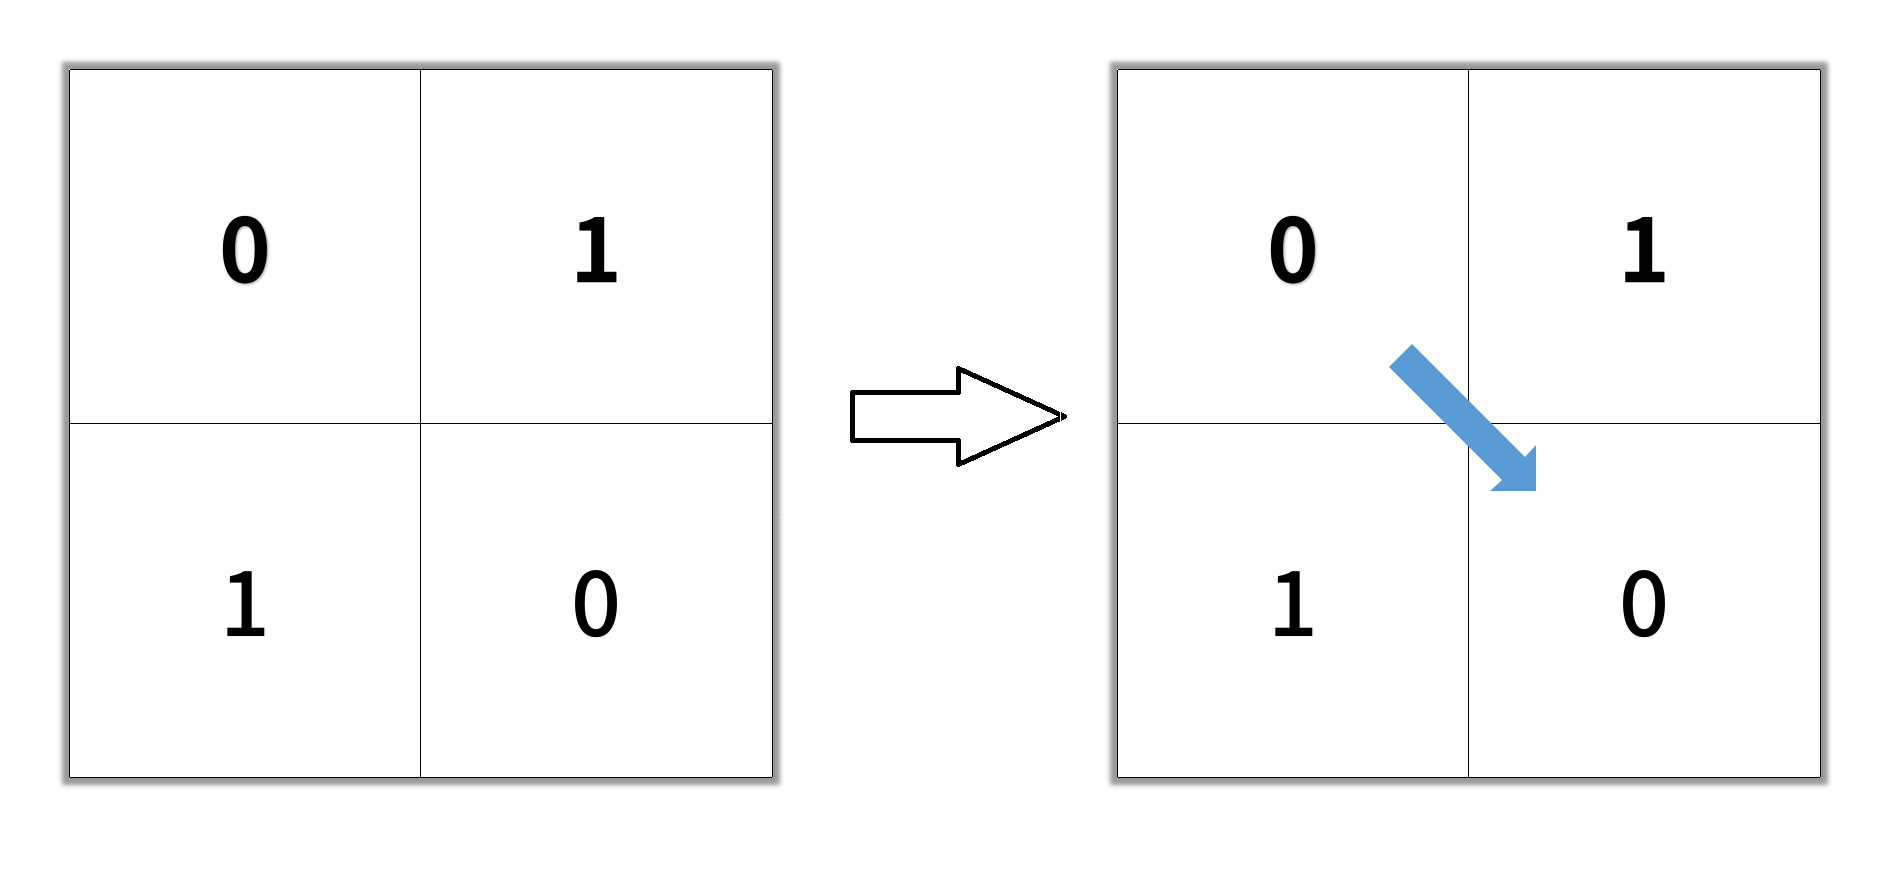

Input: grid = [[0,1],[1,0]]
Output: 2

Example 2:

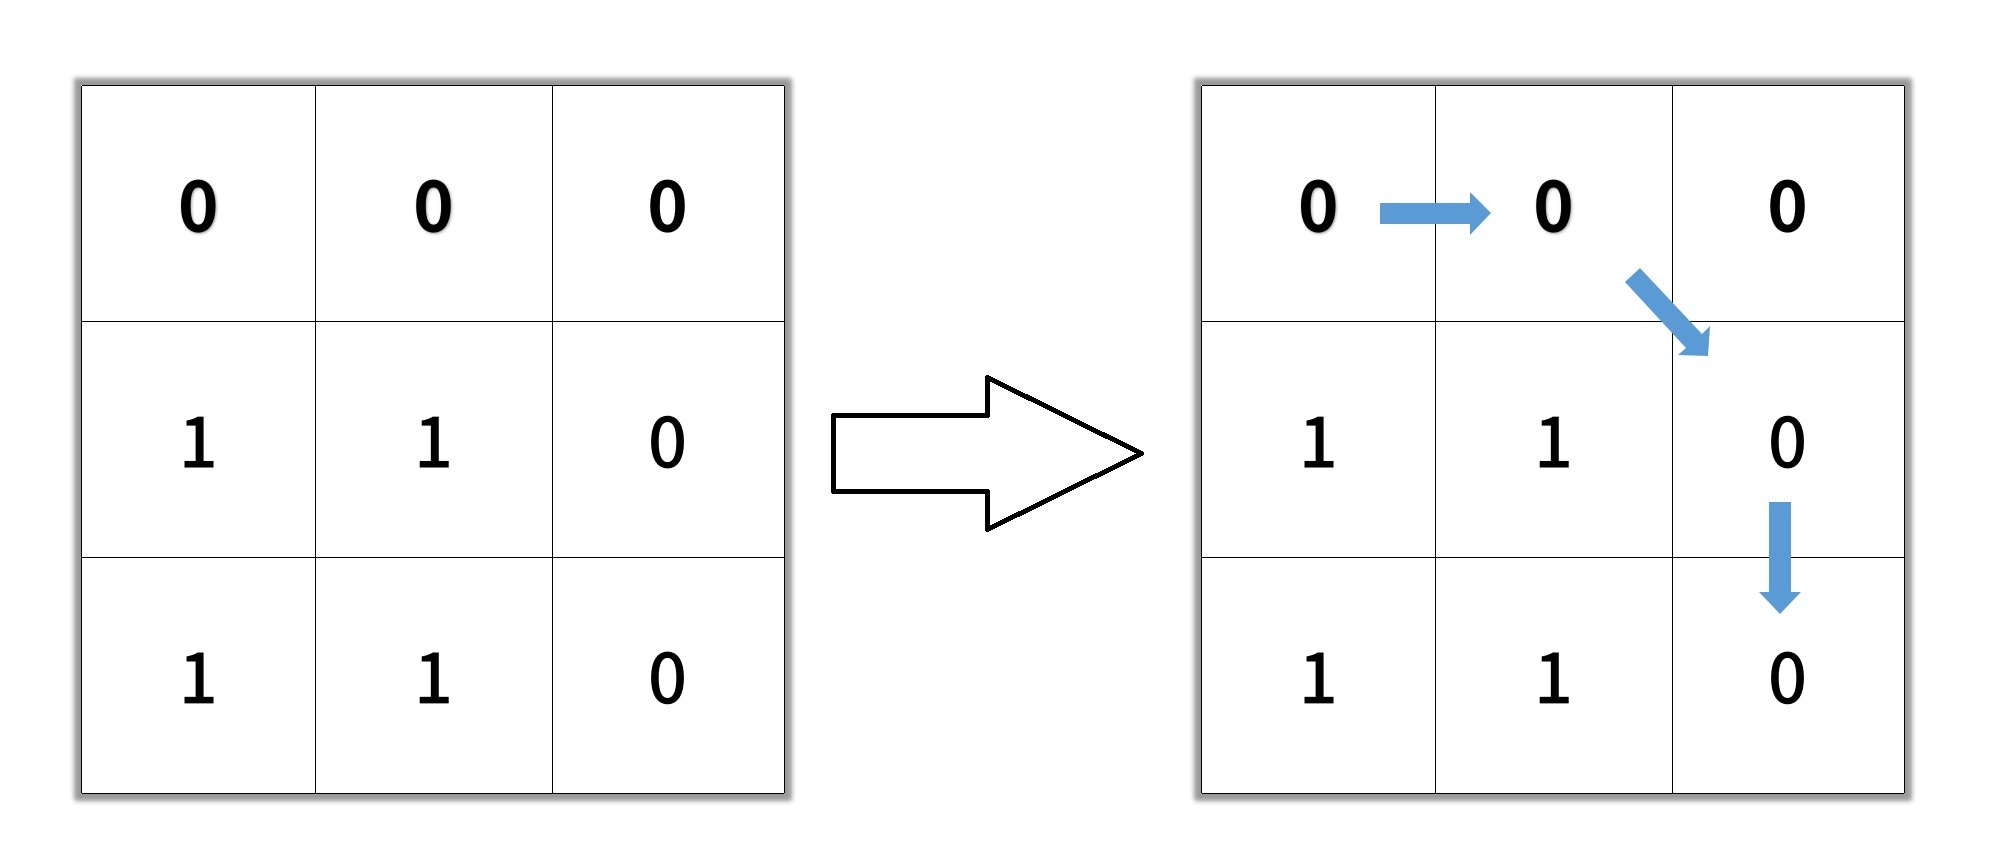

Input: grid = [[0,0,0],[1,1,0],[1,1,0]]
Output: 4

Example 3:

Input: grid = [[1,0,0],[1,1,0],[1,1,0]]
Output: -1

 

Constraints:

    n == grid.length
    n == grid[i].length
    1 <= n <= 100
    grid[i][j] is 0 or 1



In [55]:
from typing import List
from math import inf
from collections import deque

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        path_len = [[inf for _ in range(len(grid[0]))] for _ in range(len(grid))]
        max_i = len(grid) - 1
        max_j = len(grid[0]) - 1
        q = deque()
        q.append([[0, 0], []])
        while q:
            point, track = q.popleft()
            i, j = point
            if grid[i][j] != 0:
                continue
            if path_len[i][j] <= len(track):
                continue
            path_len[i][j] = len(track)
            if i == max_i and j == max_j:
                continue
            for d_i in [-1, 0, 1]:
                for d_j in [-1, 0, 1]:
                    if (
                        not (d_i == 0 and d_j == 0)
                        and (0 <= i + d_i <= max_i) 
                        and (0 <= j + d_j <= max_j)
                        and (grid[i + d_i][j + d_j] == 0)
                    ):
                        q.append([[i + d_i, j + d_j], track + [[i, j]]])

        if path_len[max_i][max_j] == inf:
            return -1
        else:
            return path_len[max_i][max_j] + 1

In [56]:
s = Solution()
s.shortestPathBinaryMatrix([[0,1],[1,0]])

2

In [57]:
s.shortestPathBinaryMatrix([[0,0,0],[1,1,0],[1,1,0]])

4

In [58]:
s.shortestPathBinaryMatrix([[1,0,0],[1,1,0],[1,1,0]])

-1